In [11]:
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import os
import numpy as np
from torchvision.datasets import ImageFolder

In [14]:
torch.cuda.set_device(-1)  # 设置GPU ID
is_cuda = True
simple_transform = transforms.Compose([transforms.Resize((224, 224)),
                                       transforms.ToTensor(),  # H, W, C -> C, W, H 归一化到(0,1)，简单直接除以255
                                       transforms.Normalize([0.485, 0.456, 0.406],  # std
                                                            [0.229, 0.224, 0.225])])

In [16]:
train = ImageFolder("E:/MAST30034/final/data/train", simple_transform)
valid = ImageFolder("E:/MAST30034/final/data/test", simple_transform)
train_loader = DataLoader(train, batch_size=1,  shuffle=False, num_workers=5)
val_loader = DataLoader(valid, batch_size=1, shuffle=False, num_workers=5)
 
vgg = models.vgg16(pretrained=True)

In [17]:
class LayerActivations:
    features = None
 
    def __init__(self, model, layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
 
    def hook_fn(self, module, input, output):
        self.features = output.cpu()
 
    def remove(self):
        self.hook.remove()
 
print(vgg.features)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [25]:
conv_out = LayerActivations(vgg.features, 10)  # 提出第 一个卷积层的输出 
img = next(iter(train_loader))[0]

In [26]:
# imshow(img)
o = vgg(Variable(img))
conv_out.remove()  #
act = conv_out.features  # act 即 第0层输出的特征

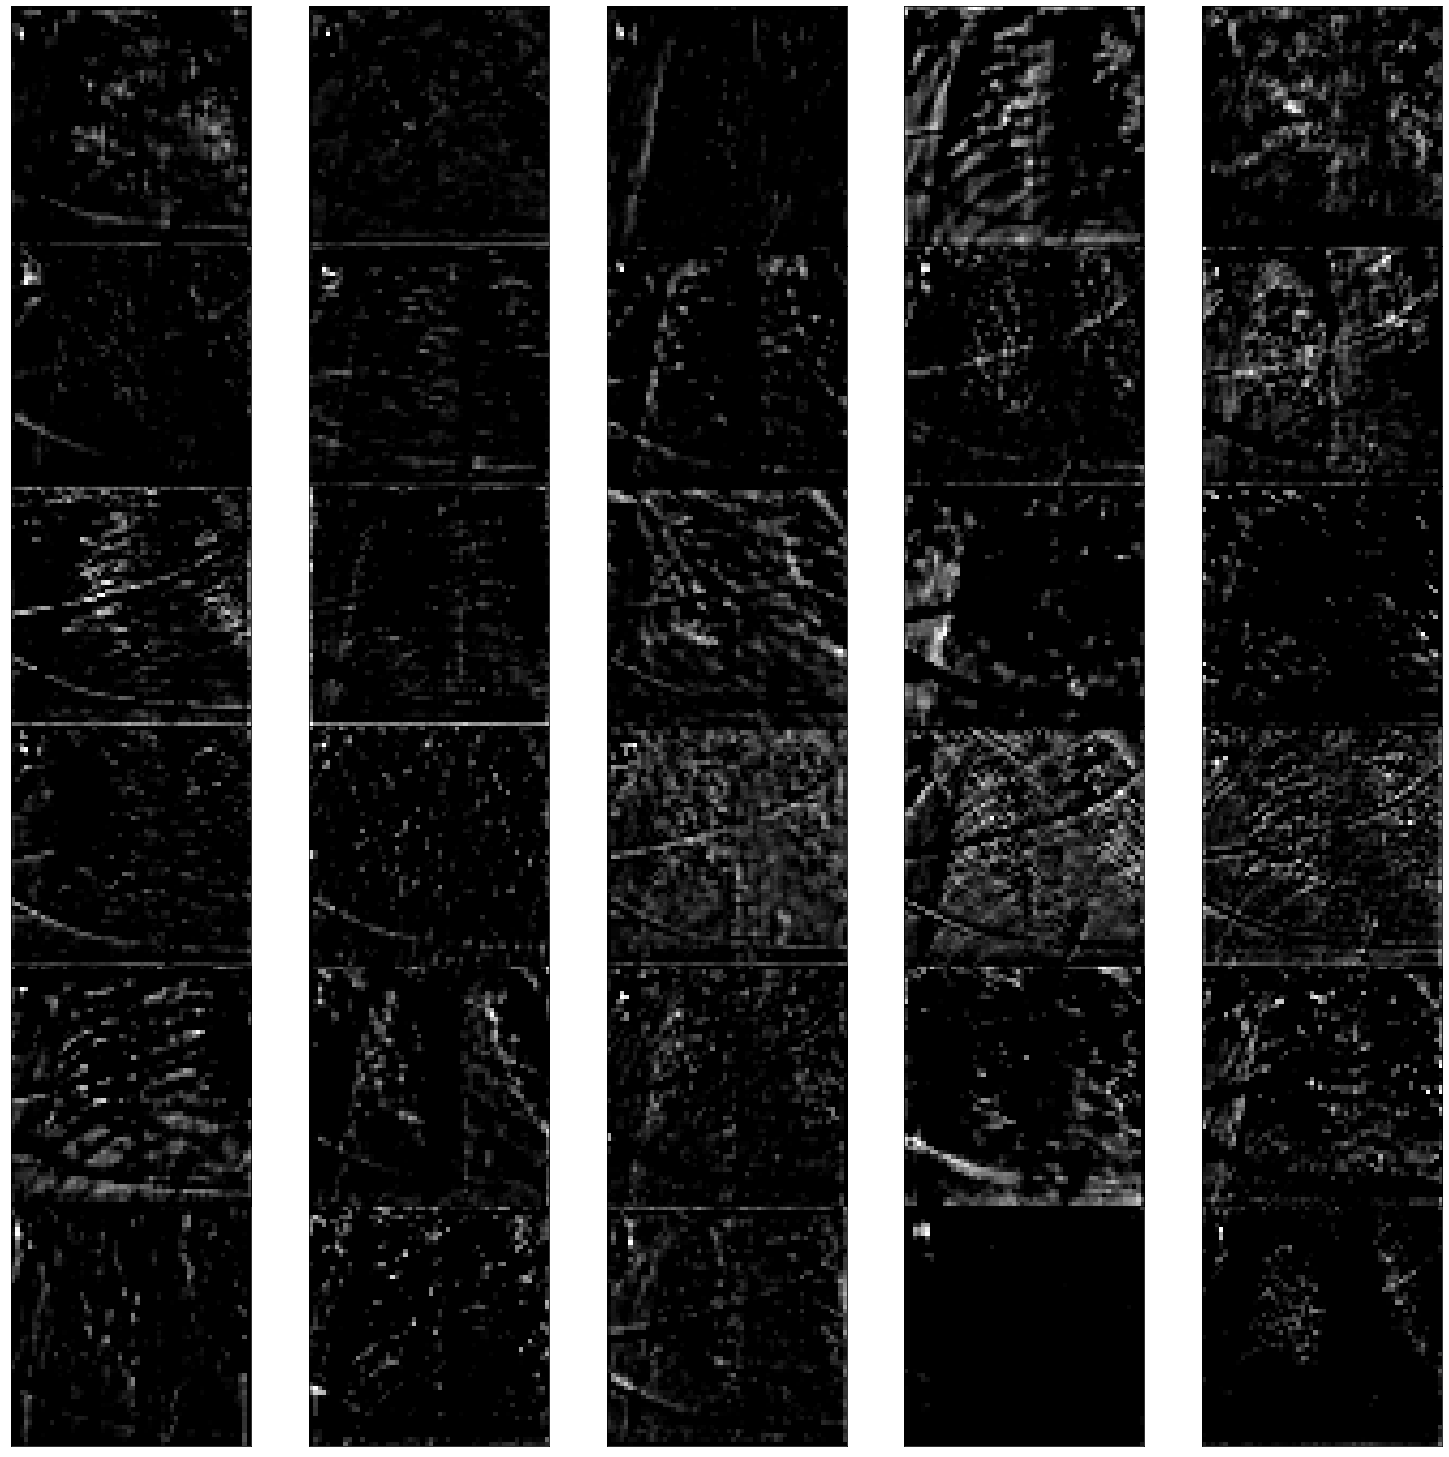

In [27]:
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)
for i in range(30):
    ax = fig.add_subplot(12, 5, i+1, xticks=[], yticks=[])
    ax.imshow(act[0][i].detach().numpy(), cmap="gray")
 
plt.show()